# Analysis of LL Pipeline Differential Against Ground Truth
Let's first load the data.

In [50]:
import pandas as pd
from LLRunner.BMAassumptions import (
    cellnames,
    BMA_final_classes,
    removed_classes,
    omitted_classes,
)

# data_path = "/Users/neo/Documents/DATA/normal_blastjusted_balanced.csv" # "/Users/neo/Documents/DATA/normal_selected_pooled_results.csv"

data_path = "/Users/neo/Documents/DATA/2024-06-24/DATA-selected/aml_blastjusted_lite_v3.csv"

df = pd.read_csv(data_path)

# print how many rows in the data
print("Number of rows in the data: ", df.shape[0])

# count remove all the rows where blast-equivalents column it non-empty
df = df[df["blast-equivalents"].isna()]
print(
    "Number of rows in the data after removing non-empty blast-equivalents: ",
    df.shape[0],
)

# add a few columes to the data frame
# blasts_grouped+L2M1, blasts_grouped-M1L2, lymphocytes_grouped+M1L2, lymphocytes_grouped-L2M1
# blasts_grouped_stacked+L2M1, blasts_grouped_stacked-M1L2, lymphocytes_grouped_stacked+M1L2, lymphocytes_grouped_stacked-L2M1

df["blasts_grouped+L2M1"] = df["blasts_grouped"] + df["L2M1"]
df["blasts_grouped-M1L2"] = df["blasts_grouped"] - df["M1L2"]
df["lymphocytes_grouped+M1L2"] = df["lymphocytes_grouped"] + df["M1L2"]
df["lymphocytes_grouped-L2M1"] = df["lymphocytes_grouped"] - df["L2M1"]

df["blasts_grouped_stacked+L2M1"] = df["blasts_grouped_stacked"] + df["L2M1"]
df["blasts_grouped_stacked-M1L2"] = df["blasts_grouped_stacked"] - df["M1L2"]
df["lymphocytes_grouped_stacked+M1L2"] = df["lymphocytes_grouped_stacked"] + df["M1L2"]
df["lymphocytes_grouped_stacked-L2M1"] = df["lymphocytes_grouped_stacked"] - df["L2M1"]

Number of rows in the data:  25
Number of rows in the data after removing non-empty blast-equivalents:  25


## Overall Diagnostics
Let's print some dataset overall numbers to get a feel for the results.

Total count average: 1238.0
B1 average: 0.1770859389517115
B1 std: 0.09758335640897697
B1 median: 0.1445086705202312
B1 stacked average: -278.0293576818396
B1 stacked std: 20.87791882149161
B1 stacked median: -279.5249827149577
B2 average: 0.12492884719576855
B2 std: 0.11953762117231517
B2 median: 0.0676230332415543
B2 stacked average: -297.47092657339795
B2 stacked std: 21.982508522314646
B2 stacked median: -295.09999756594414
E1 average: 1.2987855354830453
E1 std: 1.1820439530458673
E1 median: 0.9699321047526674
E1 stacked average: -268.63283218111394
E1 stacked std: 20.659090117054085
E1 stacked median: -272.9936472182723
E1 count average: 24.0
E1 count std: 32.86473655897623
E1 count median: 19.0
E4 average: 1.0313565053898335
E4 std: 0.8993149097046502
E4 median: 0.6944444444444444
E4 stacked average: -251.47219619519902
E4 stacked std: 20.688636792061498
E4 stacked median: -254.756022272549
E4 count average: 17.6
E4 count std: 22.15475870627648
E4 count median: 14.0
ER1 average: 

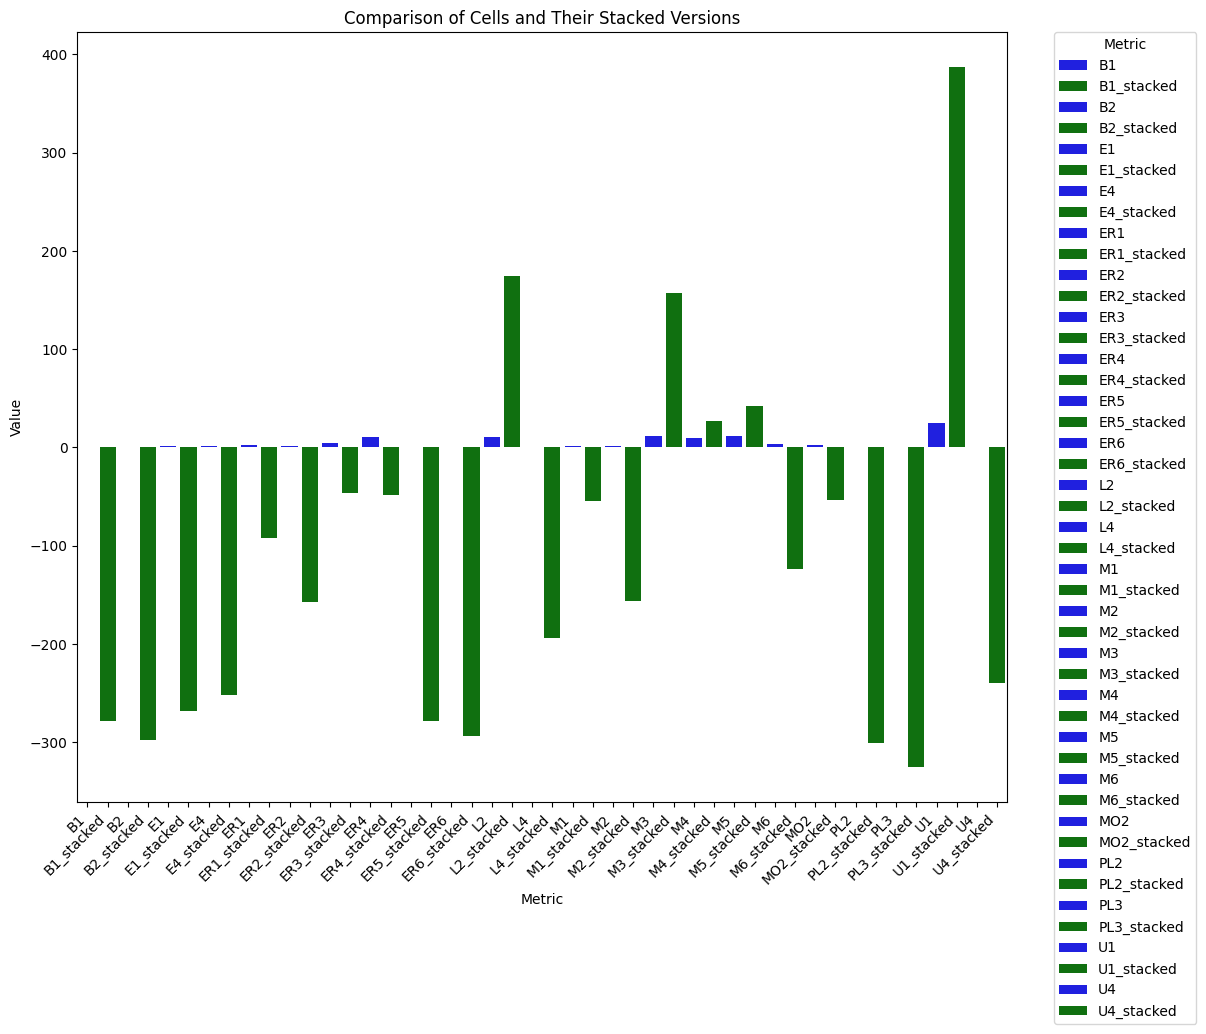

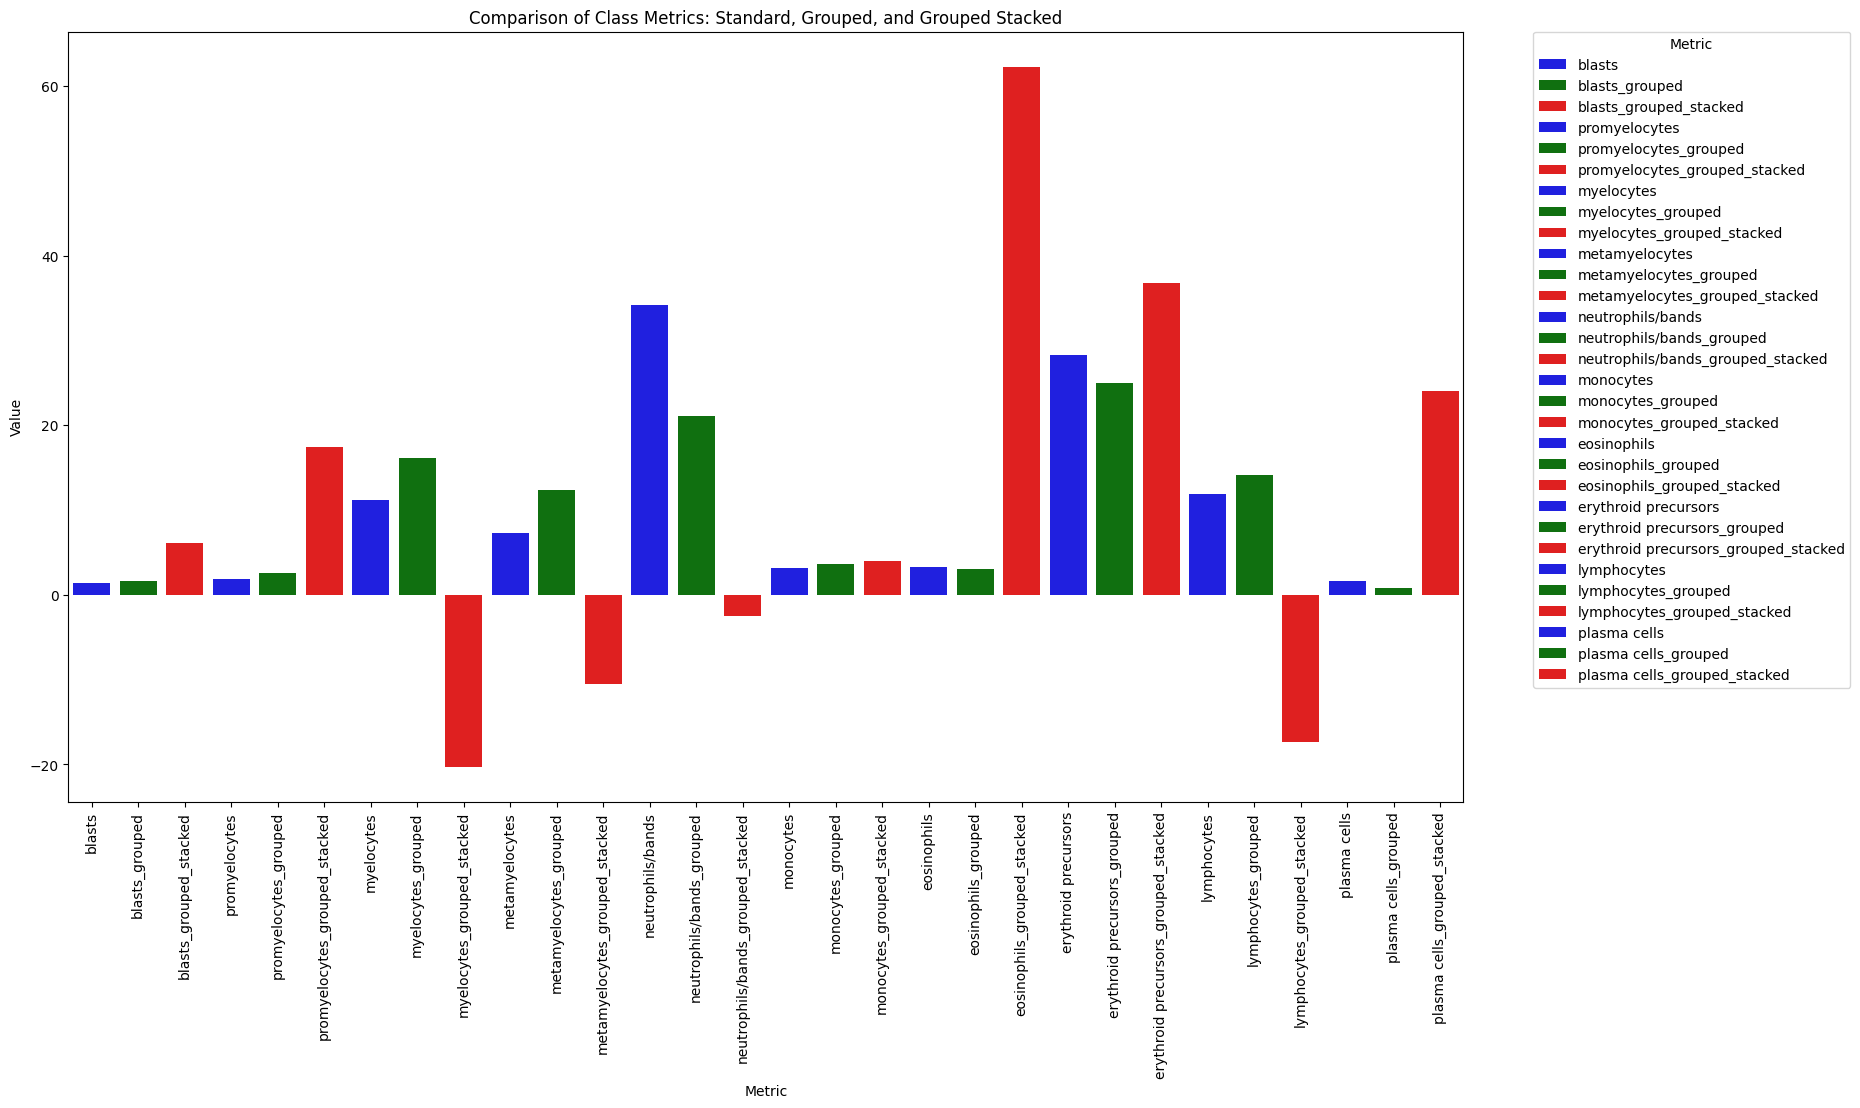

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df, cellnames, and BMA_final_classes are already defined

# new_cellnames is cellnames removing ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]
new_cellnames = [
    cellname
    for cellname in cellnames
    if cellname not in ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]
]

# sum all the cellname_count columns for each row where cellname in cellnames
df["total_count"] = df[[cellname + "_count" for cellname in new_cellnames]].sum(axis=1)

# print the average of the total_count column
print(f"Total count average: {df['total_count'].mean()}")

# for each cellname in the cellnames list, get the average across all rows for that cellname and print it
for cellname in cellnames:
    print(f"{cellname} average: {df[cellname].mean()}")
    print(f"{cellname} std: {df[cellname].std()}")
    print(f"{cellname} median: {df[cellname].median()}")

    print(f"{cellname} stacked average: {df[cellname + '_stacked'].mean()}")
    print(f"{cellname} stacked std: {df[cellname + '_stacked'].std()}")
    print(f"{cellname} stacked median: {df[cellname + '_stacked'].median()}")

    if cellname in ["B1", "B2", "ER5", "ER6", "PL2", "PL3", "U1", "U4"]:
        continue

    print(f"{cellname} count average: {df[cellname + '_count'].mean()}")
    print(f"{cellname} count std: {df[cellname + '_count'].std()}")
    print(f"{cellname} count median: {df[cellname + '_count'].median()}")

# for each class in the BMA_final_classes list, get the average across all rows for that class and print it
for class_ in BMA_final_classes:
    if class_ == "blast-equivalents":
        continue

    print(f"{class_} average: {df[(class_ + '_grouped')].mean()}")
    print(f"{class_} std: {df[(class_ + '_grouped')].std()}")
    print(f"{class_} median: {df[(class_ + '_grouped')].median()}")

    print(f"{class_} ground truth average: {df[class_].mean()}")
    print(f"{class_} ground truth std: {df[class_].std()}")
    print(f"{class_} ground truth median: {df[class_].median()}")

    print(f"{class_} count average: {df[(class_ + '_grouped_count')].mean()}")
    print(f"{class_} count std: {df[(class_ + '_grouped_count')].std()}")
    print(f"{class_} count median: {df[(class_ + '_grouped_count')].median()}")


############# Cell Classes Plot ####################


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' and lists 'cellnames' and 'BMA_final_classes'
if "blast-equivalents" in BMA_final_classes:
    BMA_final_classes.remove("blast-equivalents")

# Calculate averages for cells and their stacked versions
cell_averages = pd.DataFrame(
    [{cellname: df[cellname].mean() for cellname in cellnames}]
)
cell_stacked_averages = pd.DataFrame(
    [
        {
            cellname + "_stacked": df[cellname + "_stacked"].mean()
            for cellname in cellnames
        }
    ]
)

# Convert DataFrames to long format for plotting
cell_data = (
    pd.concat([cell_averages, cell_stacked_averages], axis=1)
    .reset_index(drop=True)
    .melt(var_name="Metric", value_name="Value")
)

# Order metrics to ensure each X is next to X_stacked
order = [
    item
    for sublist in zip(cell_averages.columns, cell_stacked_averages.columns)
    for item in sublist
]
cell_data["Metric"] = pd.Categorical(cell_data["Metric"], order)
cell_data.sort_values("Metric", inplace=True)

# Create a color palette that helps to differentiate between X and X_stacked
palette = {
    metric: "blue" if "_stacked" not in metric else "green"
    for metric in cell_data["Metric"].unique()
}

# Plotting the data
plt.figure(figsize=(12, 10))
sns.barplot(
    data=cell_data, x="Metric", y="Value", hue="Metric", palette=palette, dodge=False
)
plt.title("Comparison of Cells and Their Stacked Versions")
plt.xticks(rotation=45, ha="right")
plt.legend(
    title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0
)
plt.show()


############# Grouped classes Plot ####################

# Assuming you have a DataFrame 'df' and lists 'cellnames' and 'BMA_final_classes'
if "blast-equivalents" in BMA_final_classes:
    BMA_final_classes.remove("blast-equivalents")

# Calculate averages for class, class grouped, and class grouped stacked
class_averages = pd.DataFrame(
    [{class_name: df[class_name].mean() for class_name in BMA_final_classes}]
)
class_grouped_averages = pd.DataFrame(
    [
        {
            class_name + "_grouped": df[class_name + "_grouped"].mean()
            for class_name in BMA_final_classes
        }
    ]
)
class_grouped_stacked_averages = pd.DataFrame(
    [
        {
            class_name + "_grouped_stacked": df[class_name + "_grouped_stacked"].mean()
            for class_name in BMA_final_classes
        }
    ]
)

# Convert DataFrames to long format for plotting
class_data = (
    pd.concat(
        [class_averages, class_grouped_averages, class_grouped_stacked_averages], axis=1
    )
    .reset_index(drop=True)
    .melt(var_name="Metric", value_name="Value")
)

# Order metrics to ensure X, X_grouped, and X_grouped_stacked are grouped correctly
order = [
    item
    for sublist in zip(
        class_averages.columns,
        class_grouped_averages.columns,
        class_grouped_stacked_averages.columns,
    )
    for item in sublist
]
class_data["Metric"] = pd.Categorical(class_data["Metric"], order)
class_data.sort_values("Metric", inplace=True)

# Create a color palette that helps to differentiate between X, X_grouped, and X_grouped_stacked
palette = {
    metric: (
        "blue"
        if "_grouped" not in metric and "_stacked" not in metric
        else ("green" if "_grouped" in metric and "_stacked" not in metric else "red")
    )
    for metric in class_data["Metric"].unique()
}

# Plotting the data
plt.figure(figsize=(18, 10))  # Adjust figure size as necessary
sns.barplot(
    data=class_data, x="Metric", y="Value", hue="Metric", palette=palette, dodge=False
)
plt.title("Comparison of Class Metrics: Standard, Grouped, and Grouped Stacked")
plt.xticks(rotation=90)  # Adjust rotation if necessary
plt.legend(
    title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0
)
plt.show()

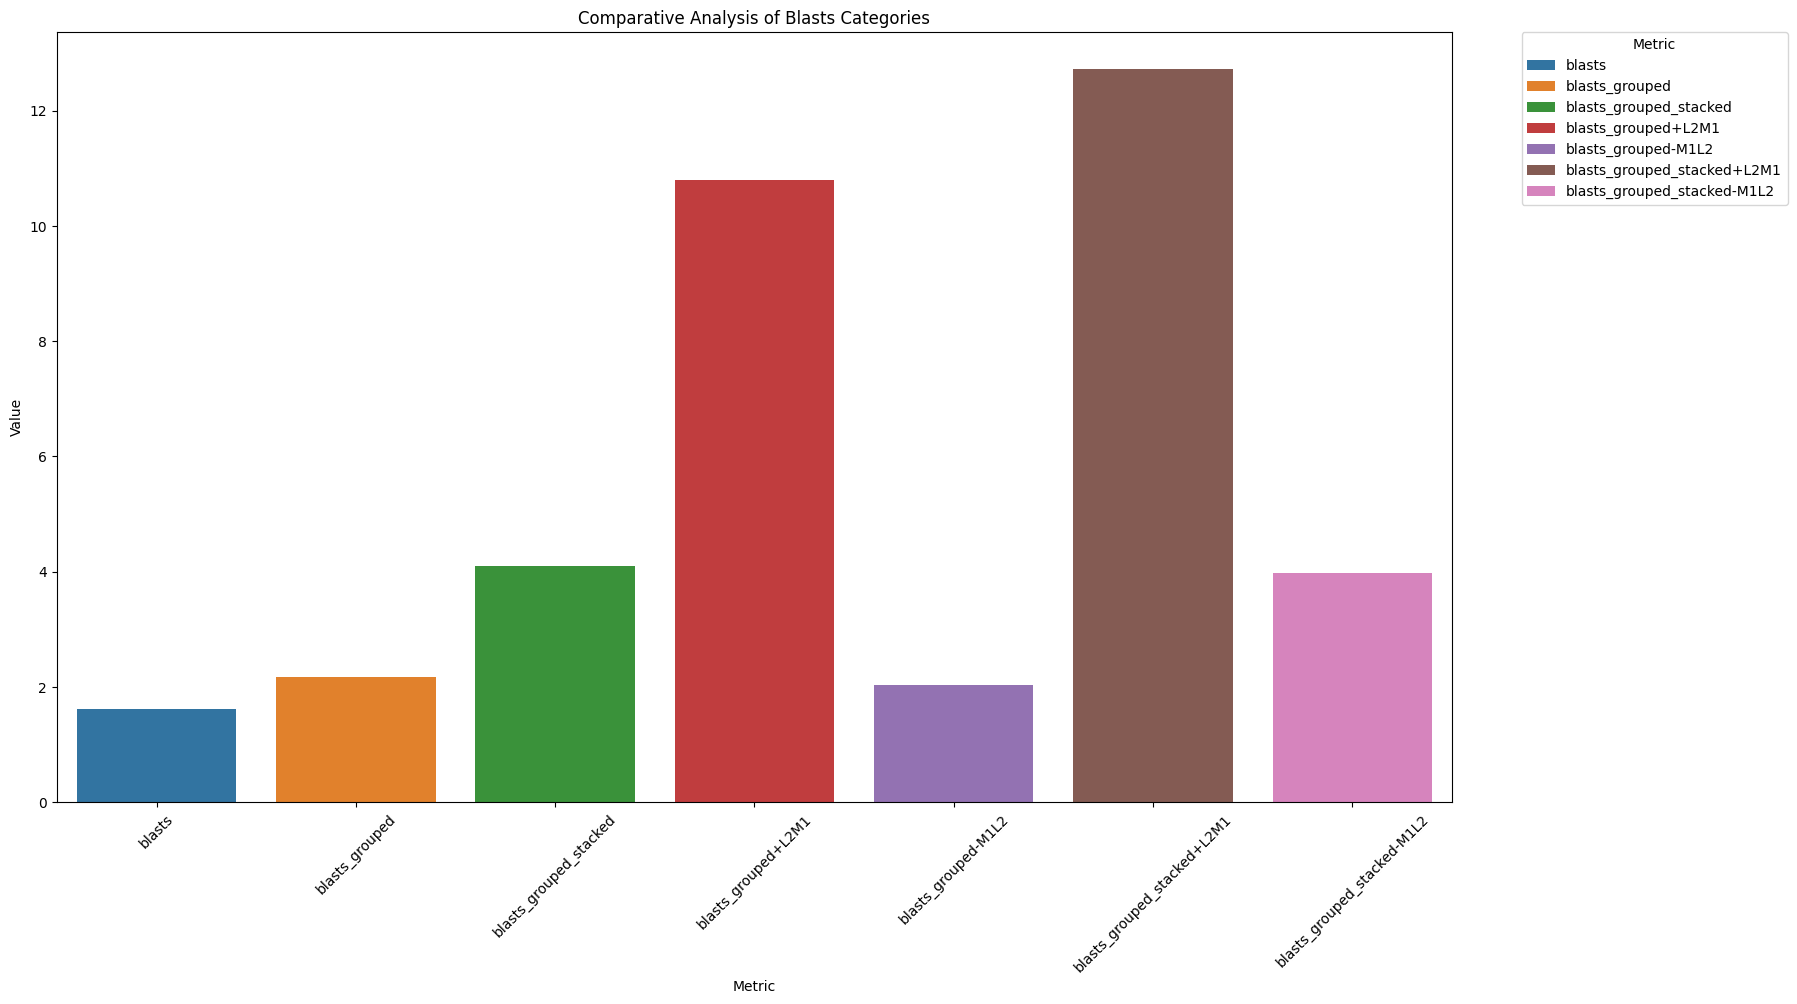

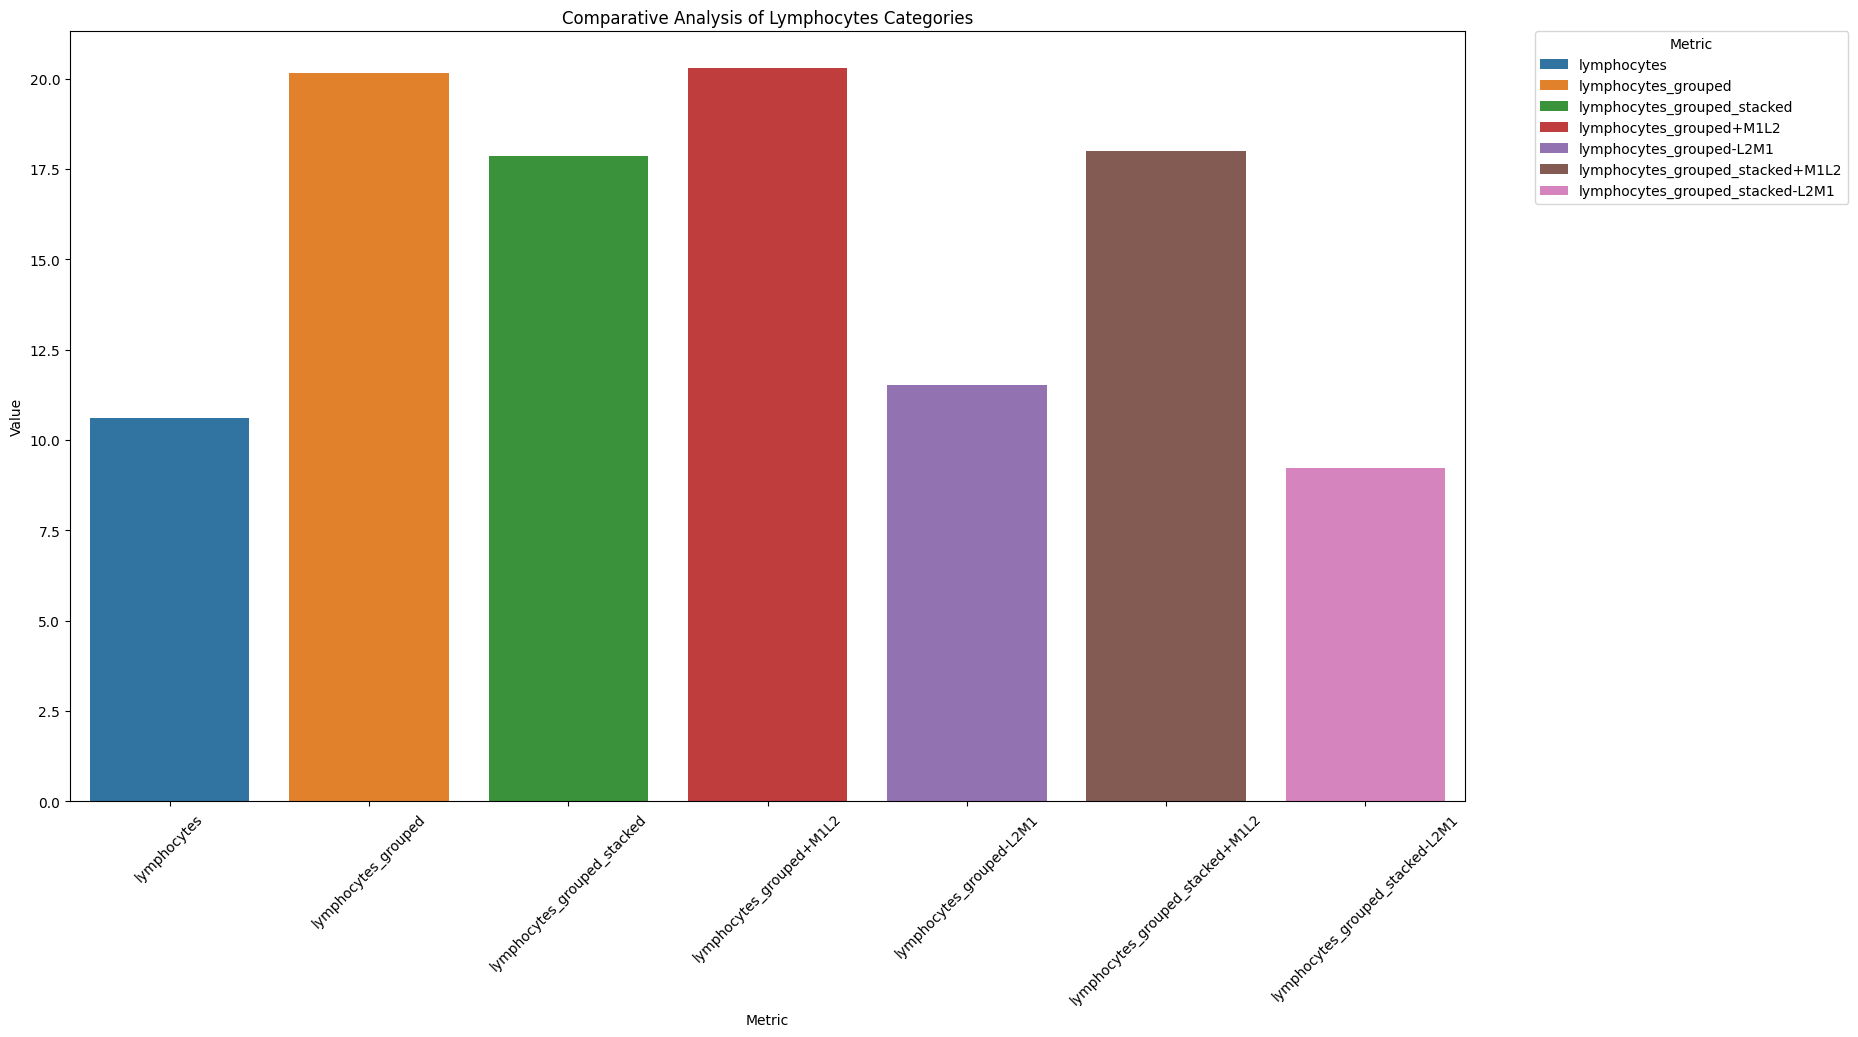

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example columns, ensure your df has these columns
columns_blasts = [
    "blasts",
    "blasts_grouped",
    "blasts_grouped_stacked",
    "blasts_grouped+L2M1",
    "blasts_grouped-M1L2",
    "blasts_grouped_stacked+L2M1",
    "blasts_grouped_stacked-M1L2",
]
columns_lymphocytes = [
    "lymphocytes",
    "lymphocytes_grouped",
    "lymphocytes_grouped_stacked",
    "lymphocytes_grouped+M1L2",
    "lymphocytes_grouped-L2M1",
    "lymphocytes_grouped_stacked+M1L2",
    "lymphocytes_grouped_stacked-L2M1",
]

# Create a single-row DataFrame with explicit index
blasts_averages = {col: df[col].mean() for col in columns_blasts}
lymphocytes_averages = {col: df[col].mean() for col in columns_lymphocytes}

blasts_data = pd.DataFrame([blasts_averages], index=[0]).melt(
    var_name="Metric", value_name="Value"
)
lymphocytes_data = pd.DataFrame([lymphocytes_averages], index=[0]).melt(
    var_name="Metric", value_name="Value"
)

# Order and plot the data
blasts_order = columns_blasts
lymphocytes_order = columns_lymphocytes

blasts_data["Metric"] = pd.Categorical(blasts_data["Metric"], blasts_order)
lymphocytes_data["Metric"] = pd.Categorical(
    lymphocytes_data["Metric"], lymphocytes_order
)

# Plotting blasts data
plt.figure(figsize=(18, 10))
sns.barplot(data=blasts_data, x="Metric", y="Value", hue="Metric", dodge=False)
plt.title("Comparative Analysis of Blasts Categories")
plt.xticks(rotation=45)
plt.legend(
    title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0
)
plt.show()

# Plotting lymphocytes data
plt.figure(figsize=(18, 10))
sns.barplot(data=lymphocytes_data, x="Metric", y="Value", hue="Metric", dodge=False)
plt.title("Comparative Analysis of Lymphocytes Categories")
plt.xticks(rotation=45)
plt.legend(
    title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0
)
plt.show()

## Dot & Identity Line Plots
Plotting a 2D dot plot for any two columns and the identity line y=x.

Number of rows removed:  0
Total number of rows:  253


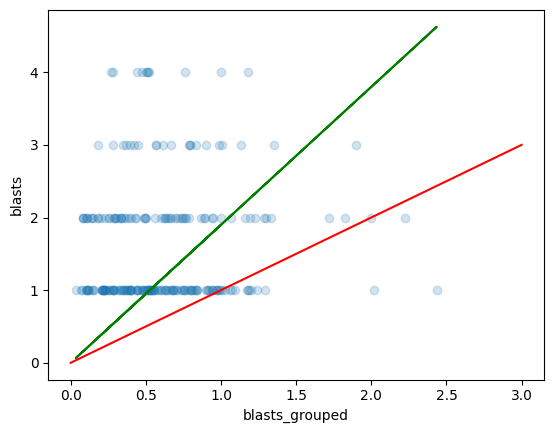

10.764
Number of rows removed:  0
Total number of rows:  253


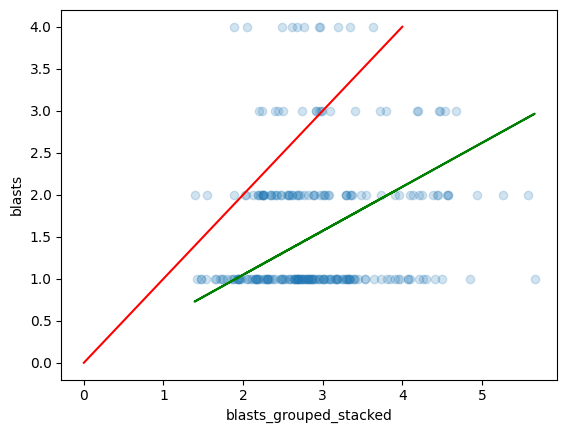

10.764
Number of rows removed:  0
Total number of rows:  253


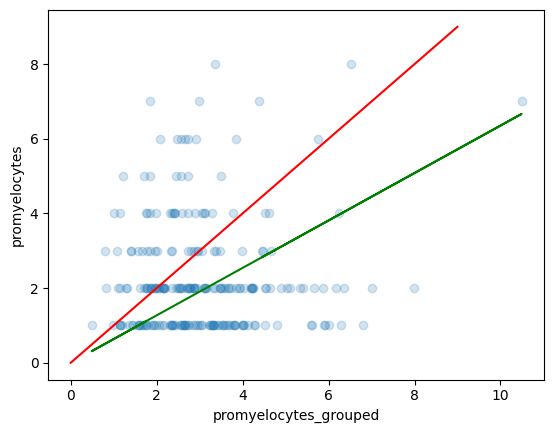

57.640316205533594
Number of rows removed:  0
Total number of rows:  253


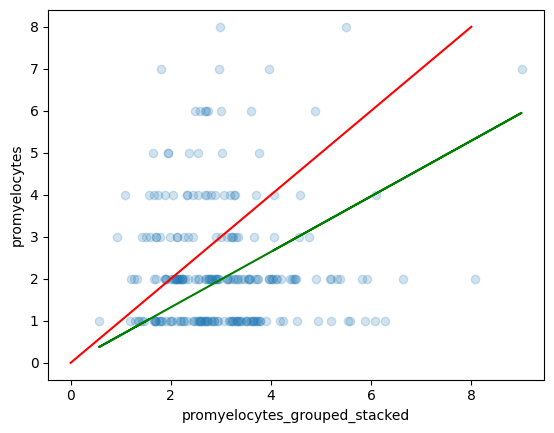

57.640316205533594
Number of rows removed:  0
Total number of rows:  253


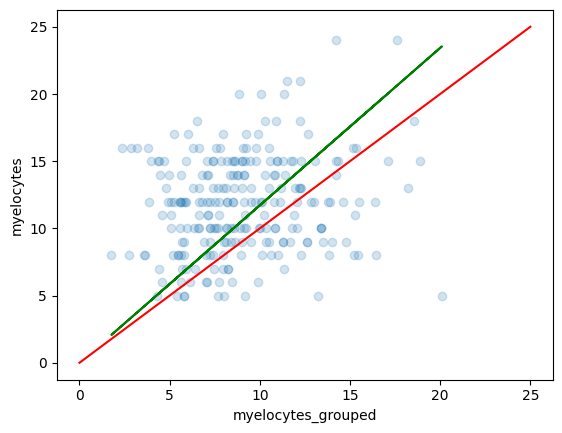

177.34387351778656
Number of rows removed:  0
Total number of rows:  253


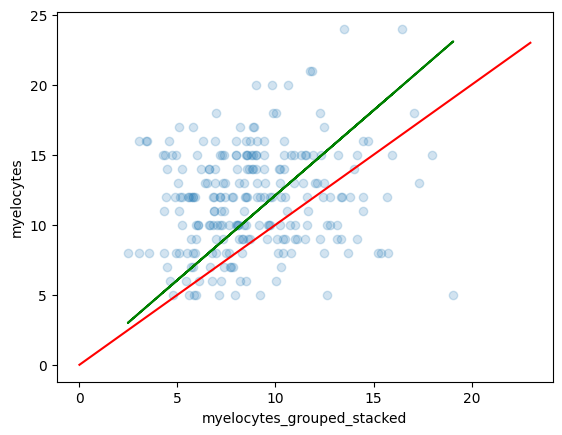

177.34387351778656
Number of rows removed:  0
Total number of rows:  253


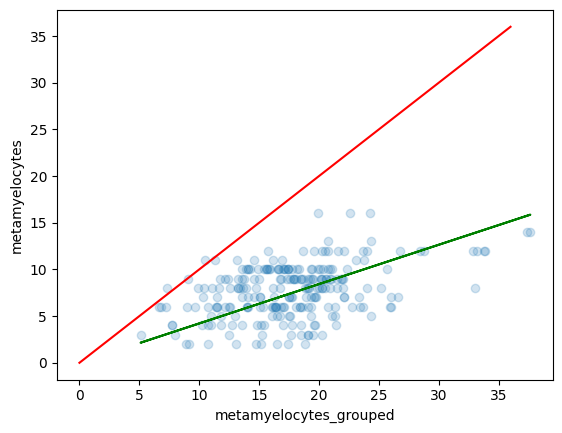

346.4822134387352
Number of rows removed:  0
Total number of rows:  253


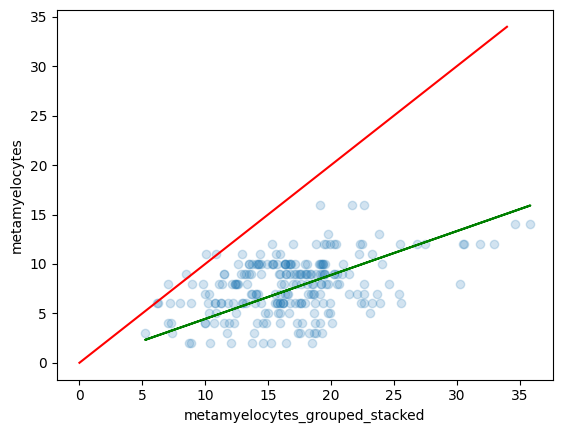

346.4822134387352
Number of rows removed:  0
Total number of rows:  253


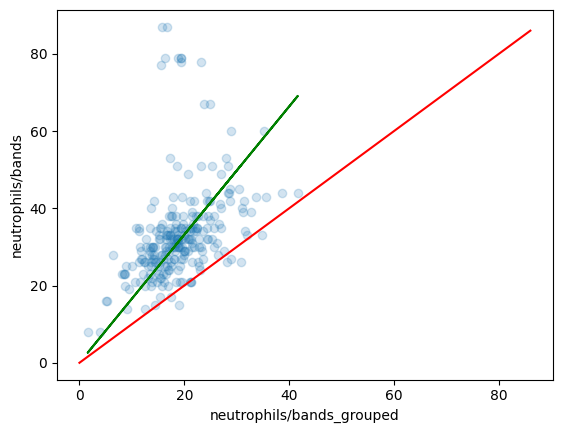

372.47430830039525
Number of rows removed:  0
Total number of rows:  253


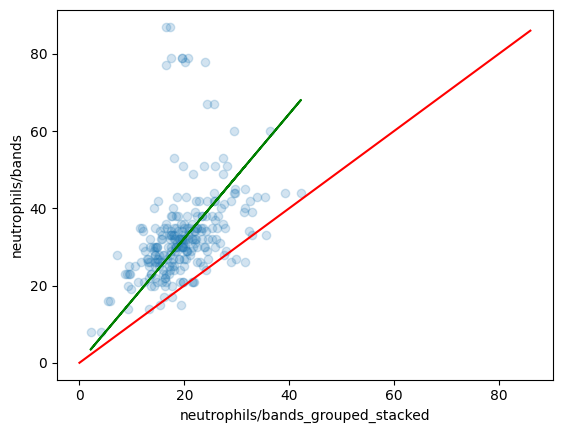

372.47430830039525
Number of rows removed:  0
Total number of rows:  253


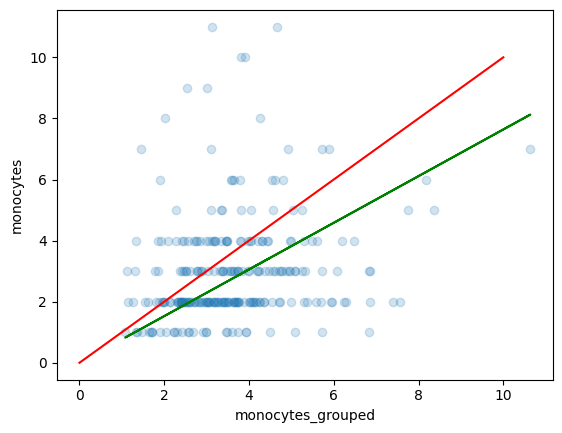

64.55335968379447
Number of rows removed:  0
Total number of rows:  253


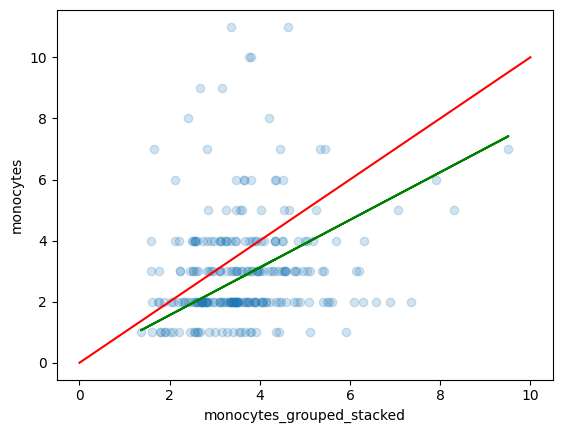

64.55335968379447
Number of rows removed:  0
Total number of rows:  253


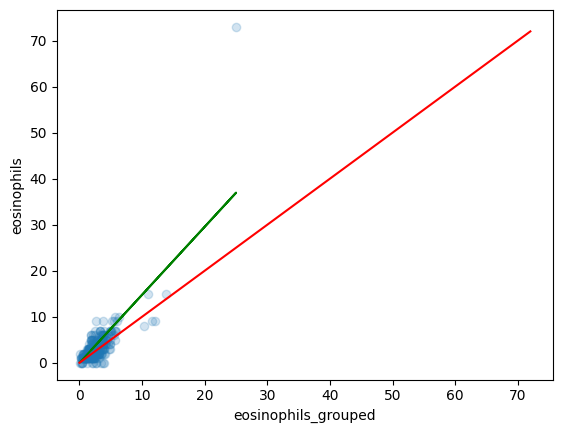

50.36904761904762
Number of rows removed:  0
Total number of rows:  253


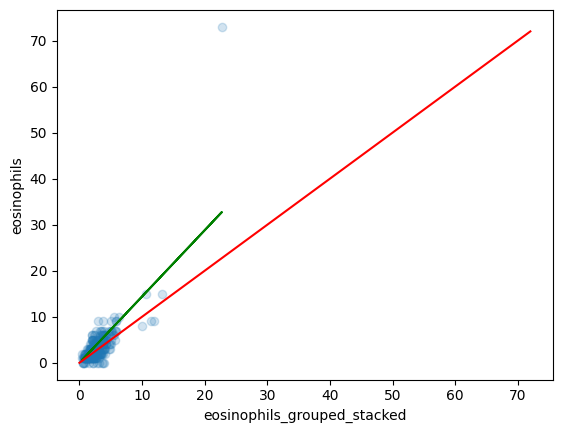

50.36904761904762
Number of rows removed:  0
Total number of rows:  253


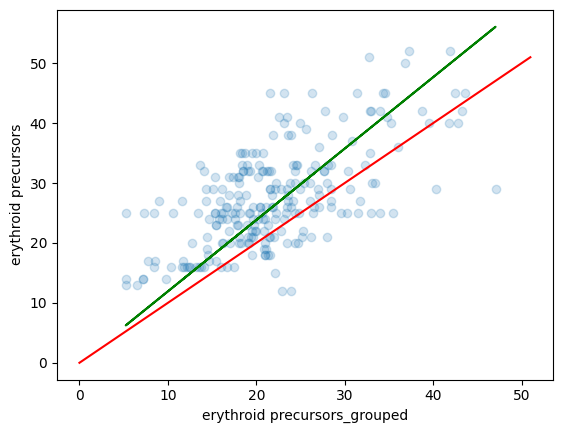

409.7509881422925
Number of rows removed:  0
Total number of rows:  253


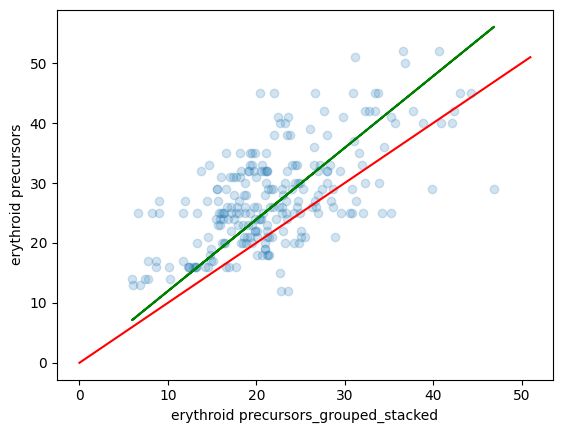

409.7509881422925
Number of rows removed:  0
Total number of rows:  253


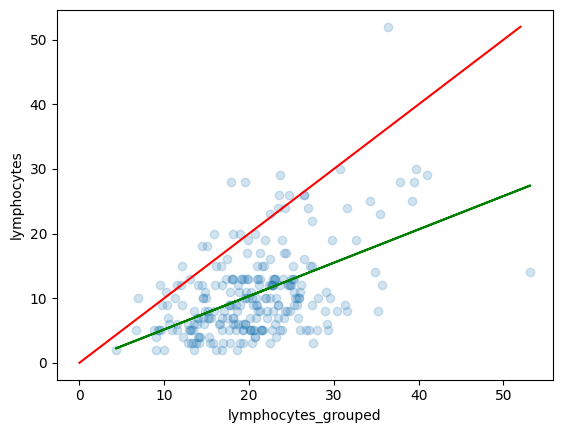

400.0158102766798
Number of rows removed:  0
Total number of rows:  253


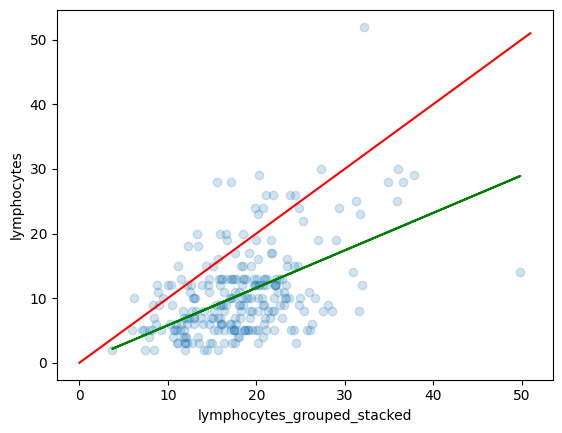

400.0158102766798
Number of rows removed:  0
Total number of rows:  253


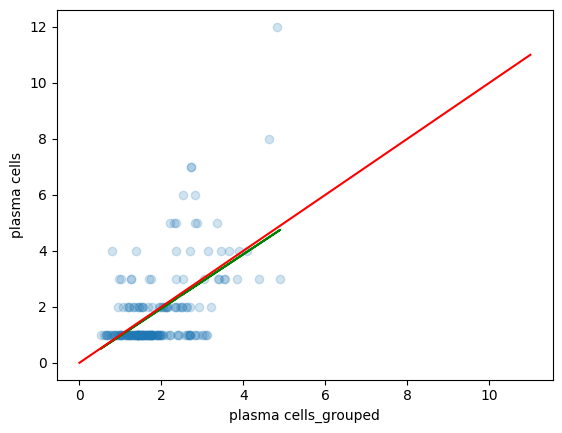

35.4703557312253
Number of rows removed:  0
Total number of rows:  253


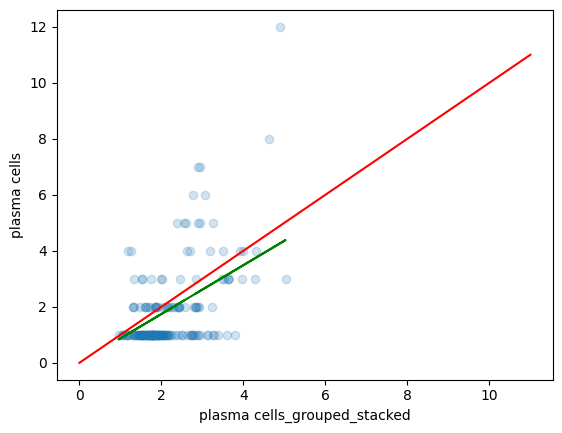

35.4703557312253


In [3]:
from sklearn.linear_model import LinearRegression


def dot_and_identity_line(column_1, column_2, intercept=False):
    """Plot a scatter plot of two columns in df with a line of y=x."""
    import matplotlib.pyplot as plt

    plt.scatter(df[column_1], df[column_2], alpha=0.2)

    # first create new_df with only the two columns and drop any rows with NaN values and print the number of rows removed
    new_df = df[[column_1, column_2]]

    # print the number of rows removed and total number of rows
    print("Number of rows removed: ", len(df) - len(new_df))
    print("Total number of rows: ", len(df))

    # drop any rows with NaN values
    new_df = new_df.dropna()

    X = new_df[[column_1]]
    y = new_df[column_2]

    model = LinearRegression(fit_intercept=intercept)
    model.fit(X, y)

    plt.plot(new_df[column_1], model.predict(X), color="green")

    # Add a line for the function f(x) = x by creating two lists of points that are identical
    x = list(range(int(max(df[column_1].max(), df[column_2].max()))))
    plt.plot(x, x, color="red")

    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()


for celltype in BMA_final_classes:
    dot_and_identity_line(f"{celltype}_grouped", celltype)
    # print the average of blasts_grouped_count
    print(df[f"{celltype}_grouped_count"].mean())

    dot_and_identity_line(f"{celltype}_grouped_stacked", celltype)
    # print the average of blasts_grouped_count
    print(df[f"{celltype}_grouped_count"].mean())

## Dot and LR Plot
Make a dot plot and run a linear regression line through the dot plot.

Number of rows removed:  0
Total number of rows:  253


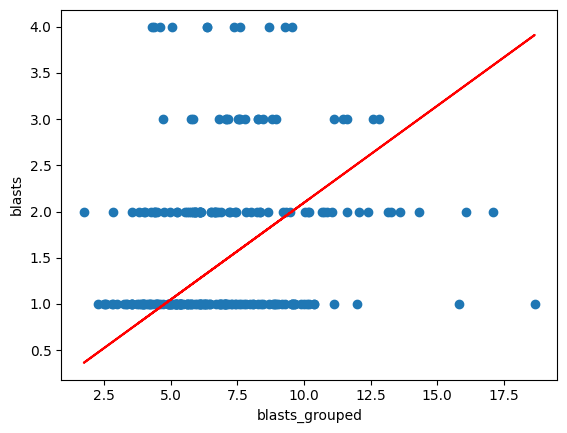

Slope:  0.20960752755297454
Intercept: Turned off
95.90118577075098
Number of rows removed:  0
Total number of rows:  253


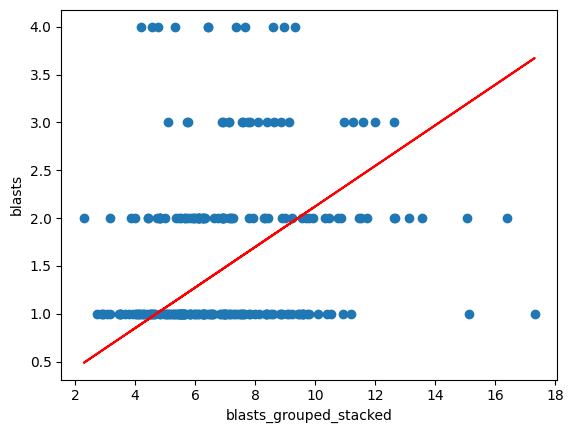

Slope:  0.21214613076528024
Intercept: Turned off
95.90118577075098
Number of rows removed:  0
Total number of rows:  253


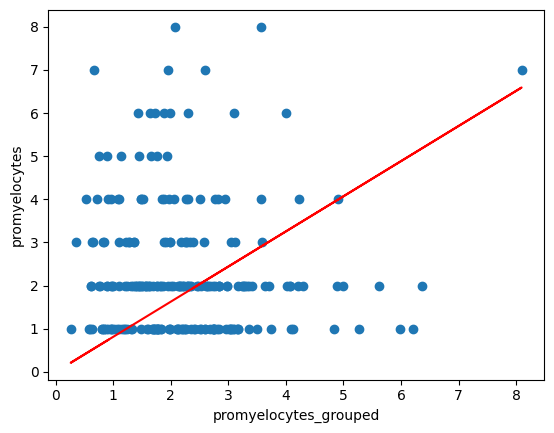

Slope:  0.8143427437504863
Intercept: Turned off
32.60079051383399
Number of rows removed:  0
Total number of rows:  253


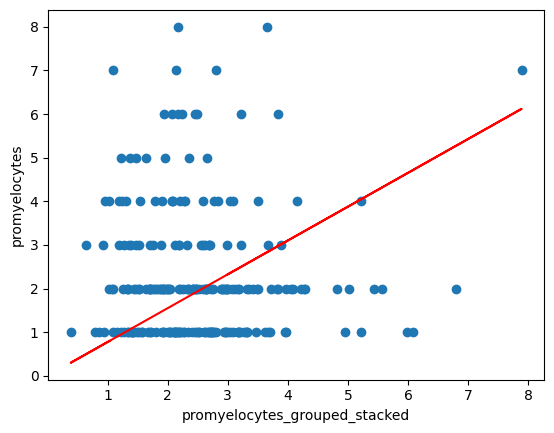

Slope:  0.7753728677981334
Intercept: Turned off
32.60079051383399
Number of rows removed:  0
Total number of rows:  253


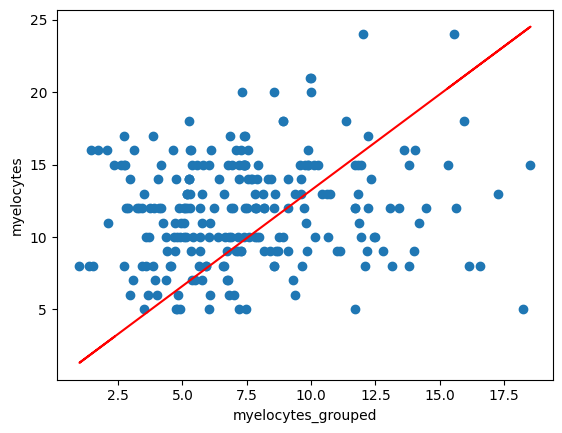

Slope:  1.3232800245847878
Intercept: Turned off
114.55731225296442
Number of rows removed:  0
Total number of rows:  253


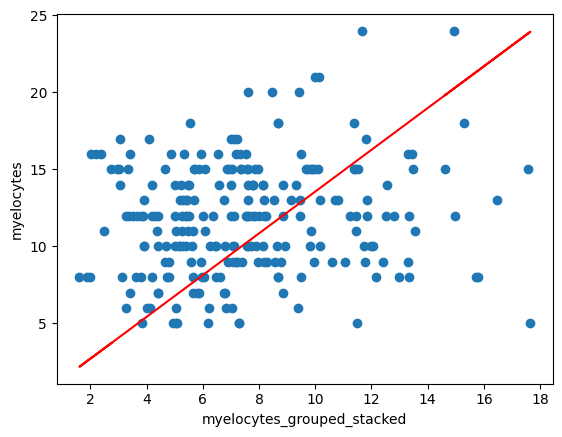

Slope:  1.3558788547774485
Intercept: Turned off
114.55731225296442
Number of rows removed:  0
Total number of rows:  253


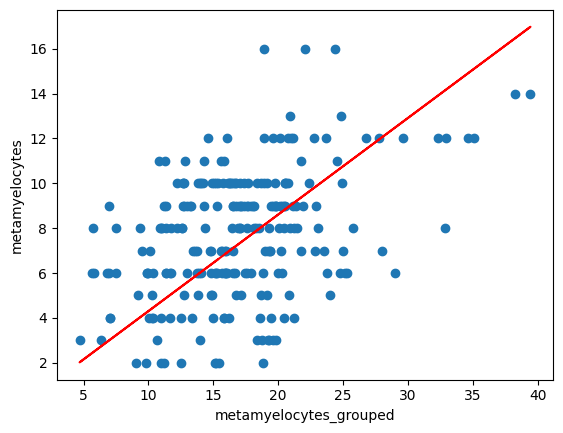

Slope:  0.43049467307991196
Intercept: Turned off
258.39525691699606
Number of rows removed:  0
Total number of rows:  253


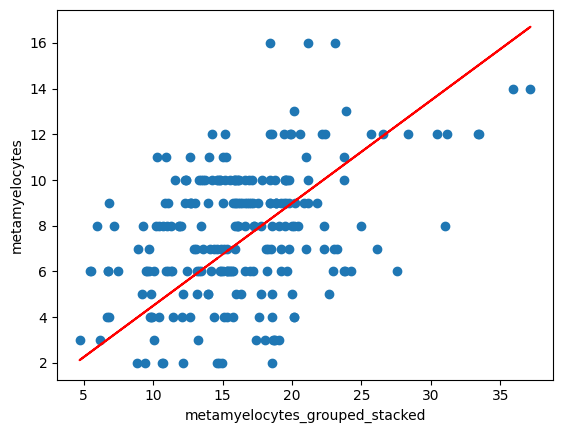

Slope:  0.4494105339359939
Intercept: Turned off
258.39525691699606
Number of rows removed:  0
Total number of rows:  253


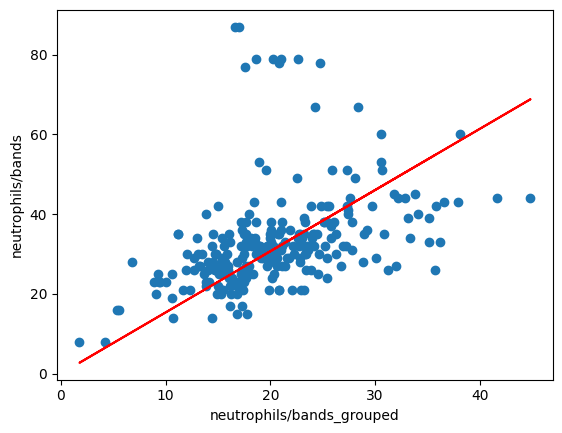

Slope:  1.535645799746609
Intercept: Turned off
309.7351778656126
Number of rows removed:  0
Total number of rows:  253


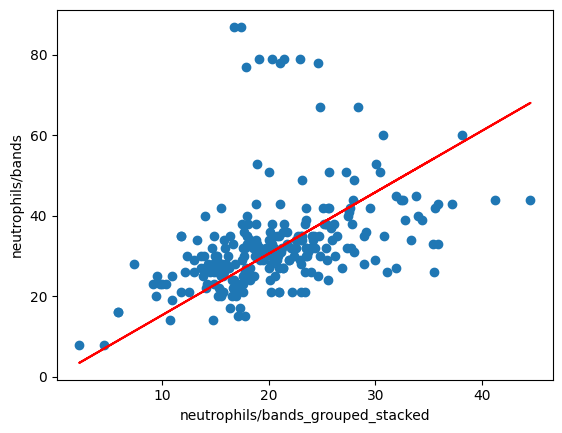

Slope:  1.5293298802108457
Intercept: Turned off
309.7351778656126
Number of rows removed:  0
Total number of rows:  253


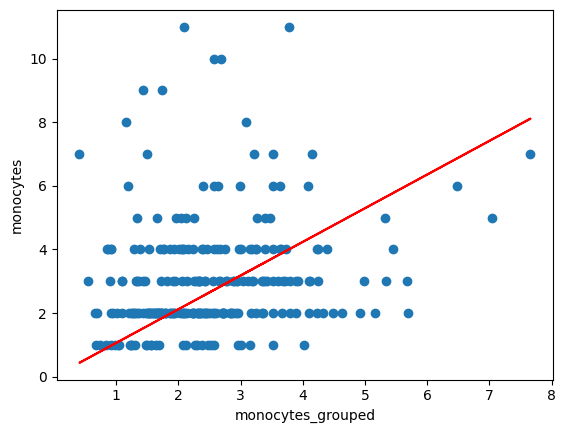

Slope:  1.0589178708565778
Intercept: Turned off
34.16600790513834
Number of rows removed:  0
Total number of rows:  253


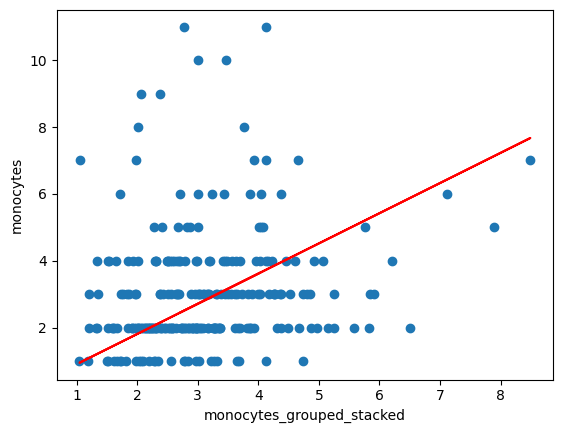

Slope:  0.9034554982481128
Intercept: Turned off
34.16600790513834
Number of rows removed:  0
Total number of rows:  253


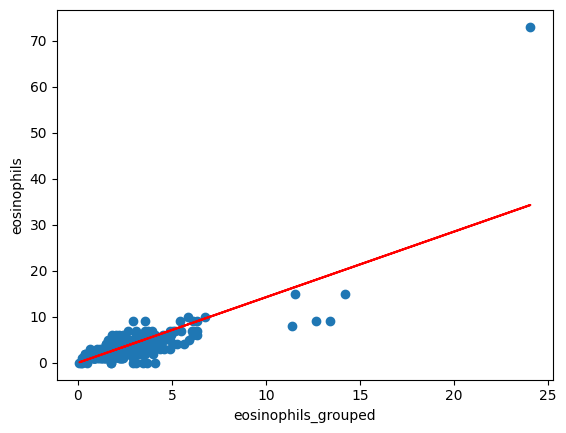

Slope:  1.4236530119928676
Intercept: Turned off
39.05622489959839
Number of rows removed:  0
Total number of rows:  253


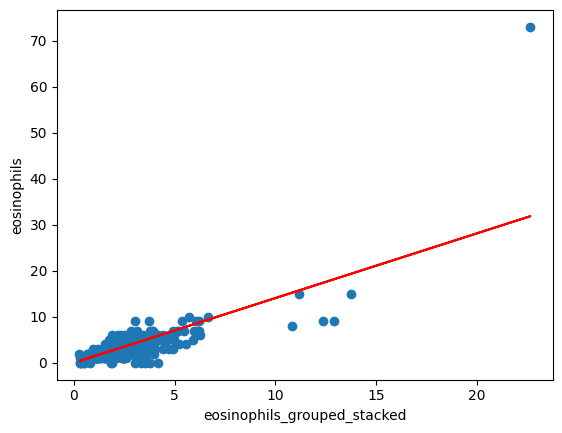

Slope:  1.404549375402859
Intercept: Turned off
39.05622489959839
Number of rows removed:  0
Total number of rows:  253


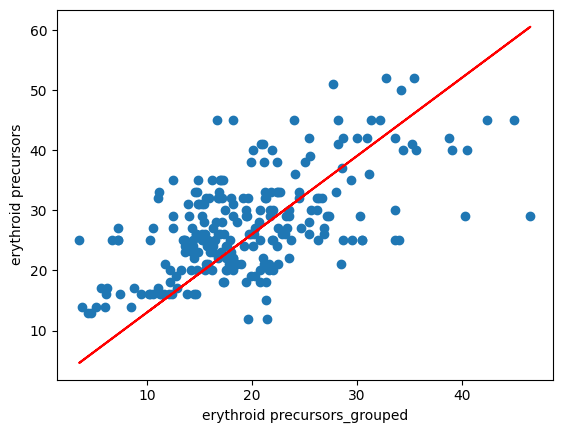

Slope:  1.301724046236869
Intercept: Turned off
281.32411067193675
Number of rows removed:  0
Total number of rows:  253


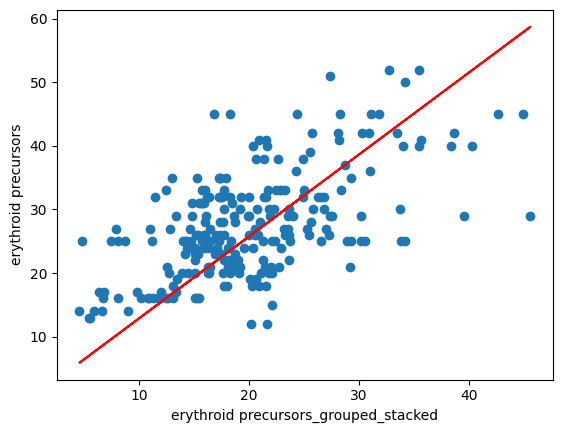

Slope:  1.2892851578653144
Intercept: Turned off
281.32411067193675
Number of rows removed:  0
Total number of rows:  253


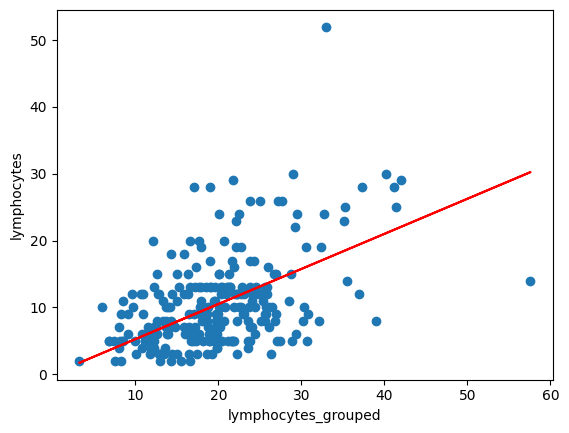

Slope:  0.5252206318512316
Intercept: Turned off
300.5612648221344
Number of rows removed:  0
Total number of rows:  253


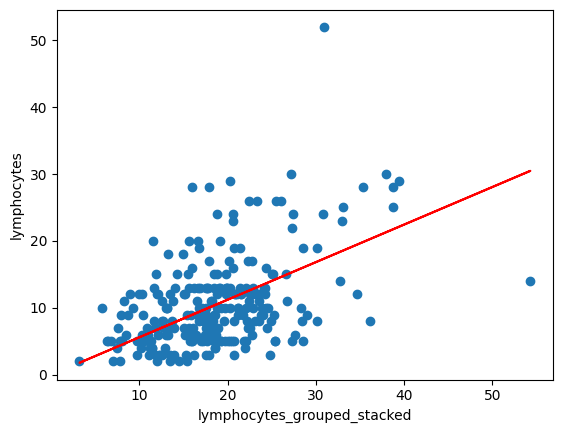

Slope:  0.5611455554617379
Intercept: Turned off
300.5612648221344
Number of rows removed:  0
Total number of rows:  253


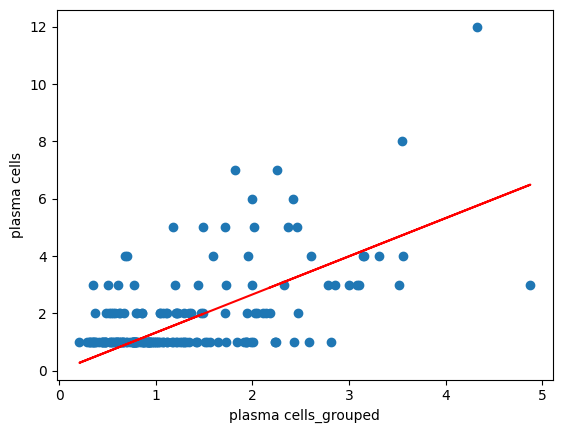

Slope:  1.3310594098151898
Intercept: Turned off
17.02777777777778
Number of rows removed:  0
Total number of rows:  253


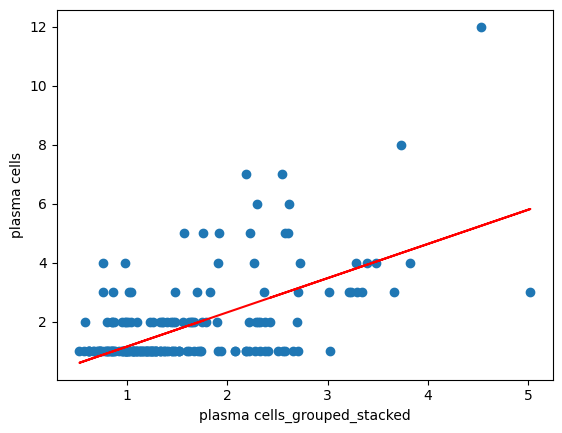

Slope:  1.1599421461053907
Intercept: Turned off
17.02777777777778


In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def dot_and_linear_regression(column_1, column_2, intercept=False):
    """Plot a scatter plot of two columns in df with a linear regression line.
    Convention, column_1 will always be multiplied by 100.
    If intercept is True, the line will have an intercept. Else, the line must pass through the origin.
    """

    # first create new_df with only the two columns and drop any rows with NaN values and print the number of rows removed
    new_df = df[[column_1, column_2]]

    # print the number of rows removed and total number of rows
    print("Number of rows removed: ", len(df) - len(new_df))
    print("Total number of rows: ", len(df))

    # drop any rows with NaN values
    new_df = new_df.dropna()

    X = new_df[[column_1]]
    y = new_df[column_2]

    model = LinearRegression(fit_intercept=intercept)
    model.fit(X, y)

    plt.scatter(new_df[column_1], new_df[column_2])
    plt.plot(new_df[column_1], model.predict(X), color="red")
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()

    # print the slope and intercept of the line
    print("Slope: ", model.coef_[0])
    if intercept:
        print("Intercept: ", model.intercept_)
    else:
        print("Intercept: Turned off")


for celltype in BMA_final_classes:
    dot_and_linear_regression(f"{celltype}_grouped", celltype, intercept=False)
    # Also print the average grouped count
    print(df[f"{celltype}_grouped_count"].mean())

    dot_and_linear_regression(f"{celltype}_grouped_stacked", celltype, intercept=False)
    # Also print the average grouped count
    print(df[f"{celltype}_grouped_count"].mean())

# M1L2 and L2M1 Experiments

Number of rows removed:  0
Total number of rows:  253


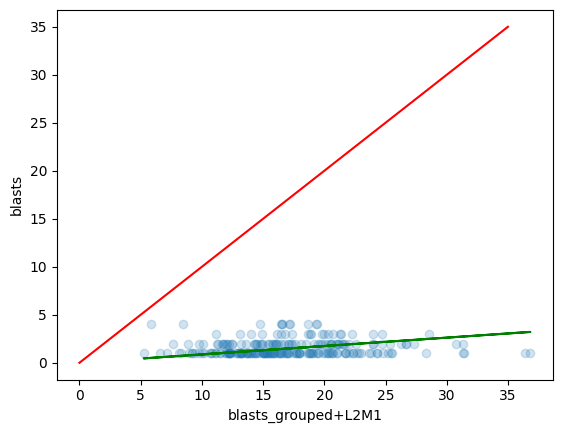

Number of rows removed:  0
Total number of rows:  253


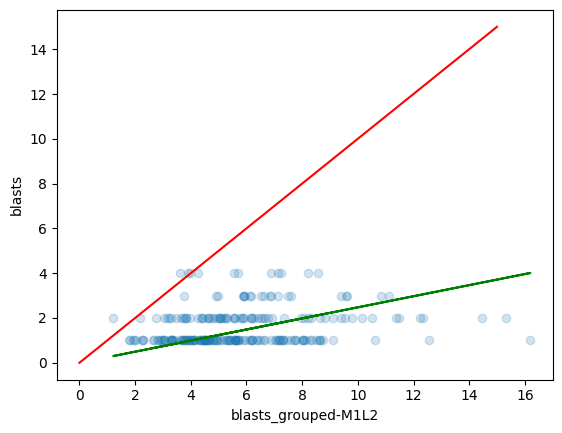

Number of rows removed:  0
Total number of rows:  253


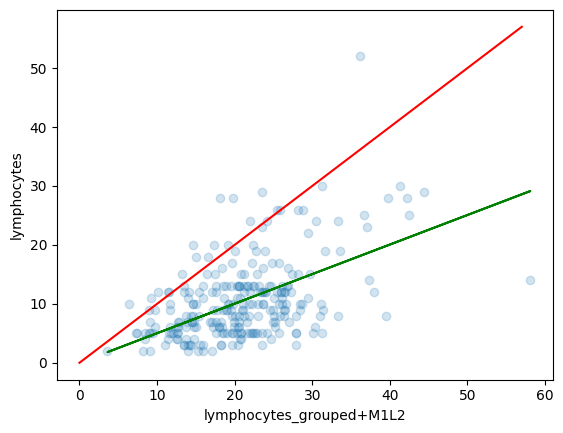

Number of rows removed:  0
Total number of rows:  253


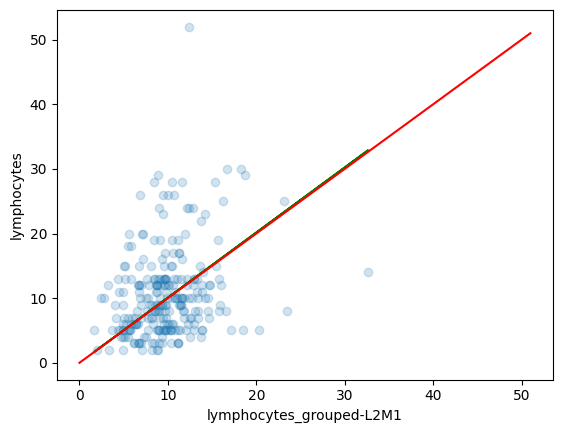

Number of rows removed:  0
Total number of rows:  253


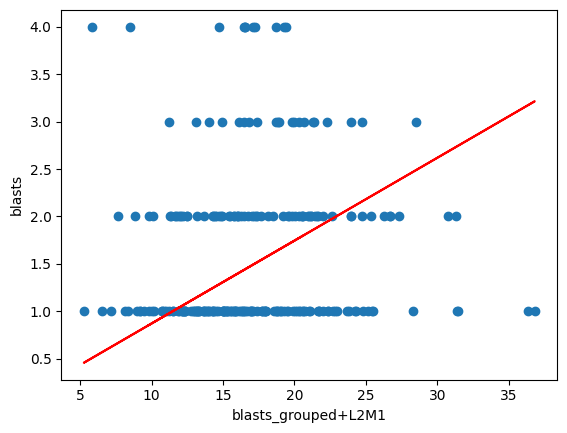

Slope:  0.08727832783103812
Intercept: Turned off
Number of rows removed:  0
Total number of rows:  253


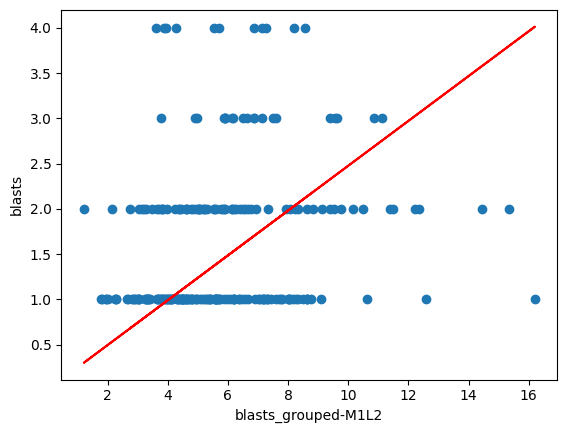

Slope:  0.2475933336146505
Intercept: Turned off
Number of rows removed:  0
Total number of rows:  253


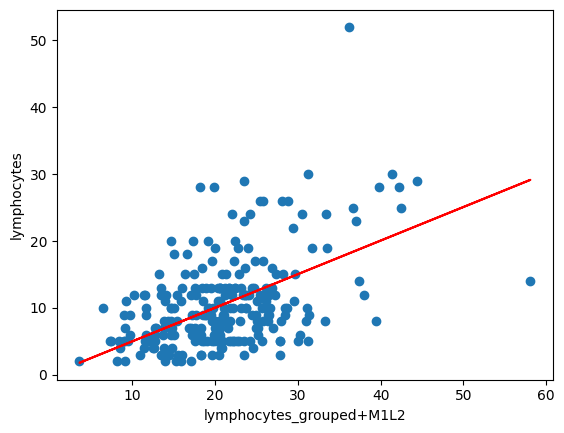

Slope:  0.5014282093049423
Intercept: Turned off
Number of rows removed:  0
Total number of rows:  253


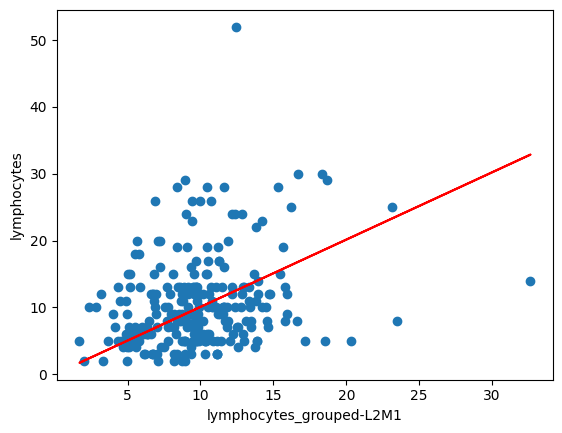

Slope:  1.0072238689691275
Intercept: Turned off


In [9]:
# make the dot plot comparing each of the new blastsX columns with the corresponding ground truth column blasts
dot_and_identity_line("blasts_grouped+L2M1", "blasts")
dot_and_identity_line("blasts_grouped-M1L2", "blasts")
dot_and_identity_line("lymphocytes_grouped+M1L2", "lymphocytes")
dot_and_identity_line("lymphocytes_grouped-L2M1", "lymphocytes")


do_intercept = False
dot_and_linear_regression("blasts_grouped+L2M1", "blasts", intercept=do_intercept)
dot_and_linear_regression("blasts_grouped-M1L2", "blasts", intercept=do_intercept)
dot_and_linear_regression(
    "lymphocytes_grouped+M1L2", "lymphocytes", intercept=do_intercept
)
dot_and_linear_regression(
    "lymphocytes_grouped-L2M1", "lymphocytes", intercept=do_intercept
)

# BUCKET TESTS FOR NORMAL SLIDES
The normal reference ranges for the different grouped celltypes is given by.

In [53]:
# Configure all the cell classes bucket classification tasks for normal BMA WSIs

print(BMA_final_classes)
grouped_class_buckets = {
    "blasts": (0, 5),
    "promyelocytes": (0, 5.5),
    "myelocytes": (5.8, 24),
    "metamyelocytes": (1, 12),
    "neutrophils/bands": (9, 45.9),
    "eosinophils": (0.5, 7),
    "monocytes": (0, 6),
    "erythroid precursors": (8.8, 34.5),  # the upper bound is argmax
    "lymphocytes": (5.5, 23.2),
    "plasma cells": (0, 7),
}

# grouped_class_buckets = {
#     "blasts": (0, 3),
#     "promyelocytes": (2, 8),
#     "myelocytes": (10, 13),
#     "metamyelocytes": (10, 15),
#     "neutrophils/bands": (25, 40),
#     "eosinophils": (1, 3),
#     "monocytes": (0, 1),
#     "erythroid precursors": (15, 27),
#     "lymphocytes": (10, 15),
#     "plasma cells": (0, 1),
# }


assert set(grouped_class_buckets.keys()) == set(BMA_final_classes)

['blasts', 'promyelocytes', 'myelocytes', 'metamyelocytes', 'neutrophils/bands', 'monocytes', 'eosinophils', 'erythroid precursors', 'lymphocytes', 'plasma cells']


In [47]:
# Check how many percent of data is in each bucket
for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    print(
        f"Percentage of data in {class_} bucket: ",
        len(df[(df[class_] >= lower) & (df[class_] <= upper)]) / len(df) * 100,
    )
for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    print(
        f"Percentage of data in {class_} bucket: ",
        len(df[(df[class_ + "_grouped"] >= lower) & (df[class_ + "_grouped"] <= upper)])
        / len(df)
        * 100,
    )

for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    print(
        f"Percentage of data in {class_} bucket: ",
        len(
            df[
                (df[class_ + "_grouped_stacked"] >= lower)
                & (df[class_ + "_grouped_stacked"] <= upper)
            ]
        )
        / len(df)
        * 100,
    )

Percentage of data in blasts bucket:  87.5
Percentage of data in promyelocytes bucket:  62.5
Percentage of data in myelocytes bucket:  25.0
Percentage of data in metamyelocytes bucket:  70.83333333333334
Percentage of data in neutrophils/bands bucket:  50.0
Percentage of data in monocytes bucket:  83.33333333333334
Percentage of data in eosinophils bucket:  79.16666666666666
Percentage of data in erythroid precursors bucket:  45.83333333333333
Percentage of data in lymphocytes bucket:  54.166666666666664
Percentage of data in plasma cells bucket:  45.83333333333333
Percentage of data in blasts bucket:  12.5
Percentage of data in promyelocytes bucket:  66.66666666666666
Percentage of data in myelocytes bucket:  58.333333333333336
Percentage of data in metamyelocytes bucket:  83.33333333333334
Percentage of data in neutrophils/bands bucket:  16.666666666666664
Percentage of data in monocytes bucket:  33.33333333333333
Percentage of data in eosinophils bucket:  41.66666666666667
Percentag

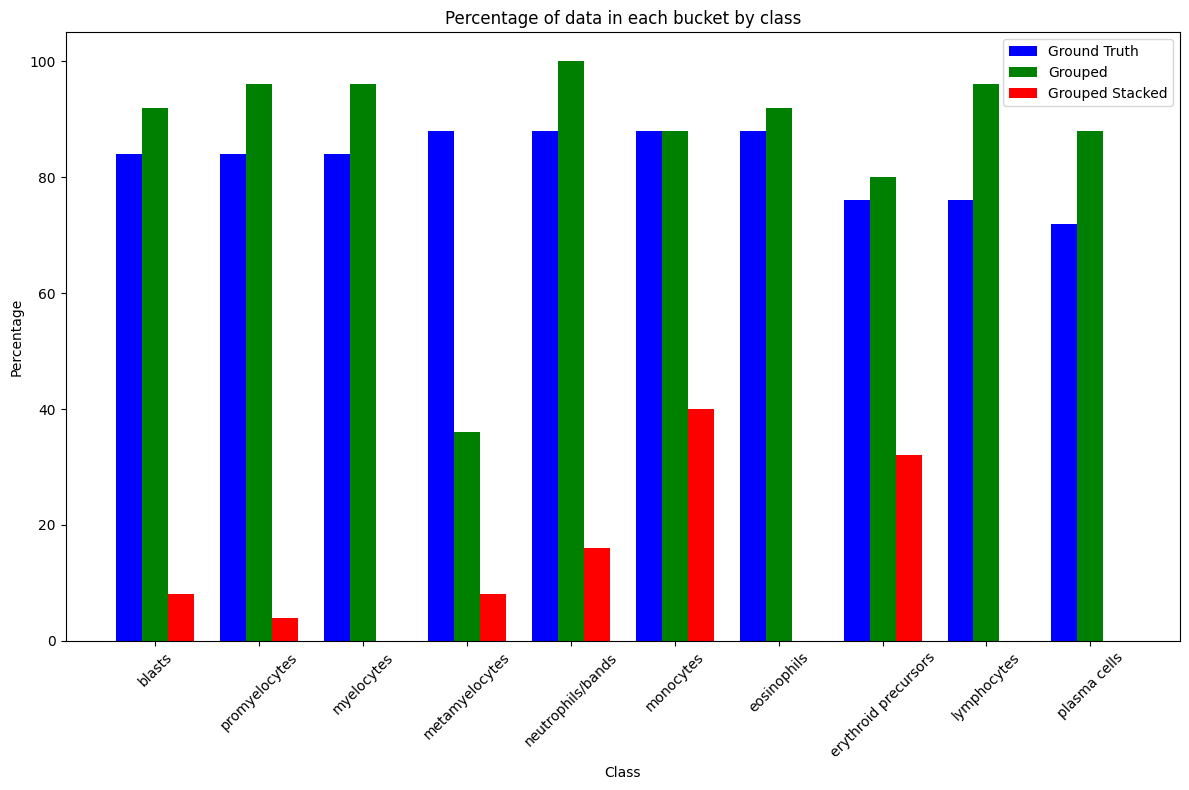

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup (Assuming df and BMA_final_classes, grouped_class_buckets are predefined)
percentages = {"ground truth": [], "grouped": [], "grouped_stacked": []}
classes = []

# Calculate percentages for each class and bucket type
for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    # Replace 'normal' with 'ground truth'
    ground_truth_count = (
        len(df[(df[class_] >= lower) & (df[class_] <= upper)]) / len(df) * 100
    )
    grouped_count = (
        len(df[(df[class_ + "_grouped"] >= lower) & (df[class_ + "_grouped"] <= upper)])
        / len(df)
        * 100
    )
    stacked_count = (
        len(
            df[
                (df[class_ + "_grouped_stacked"] >= lower)
                & (df[class_ + "_grouped_stacked"] <= upper)
            ]
        )
        / len(df)
        * 100
    )

    percentages["ground truth"].append(ground_truth_count)
    percentages["grouped"].append(grouped_count)
    percentages["grouped_stacked"].append(stacked_count)
    classes.append(class_)

# Number of groups
num_classes = len(classes)
index = np.arange(num_classes)  # Group positions
bar_width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Create bars for each data type
rects1 = ax.bar(
    index, percentages["ground truth"], bar_width, label="Ground Truth", color="b"
)
rects2 = ax.bar(
    index + bar_width, percentages["grouped"], bar_width, label="Grouped", color="g"
)
rects3 = ax.bar(
    index + 2 * bar_width,
    percentages["grouped_stacked"],
    bar_width,
    label="Grouped Stacked",
    color="r",
)

# Add some text for labels, title and axes ticks
ax.set_xlabel("Class")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of data in each bucket by class")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

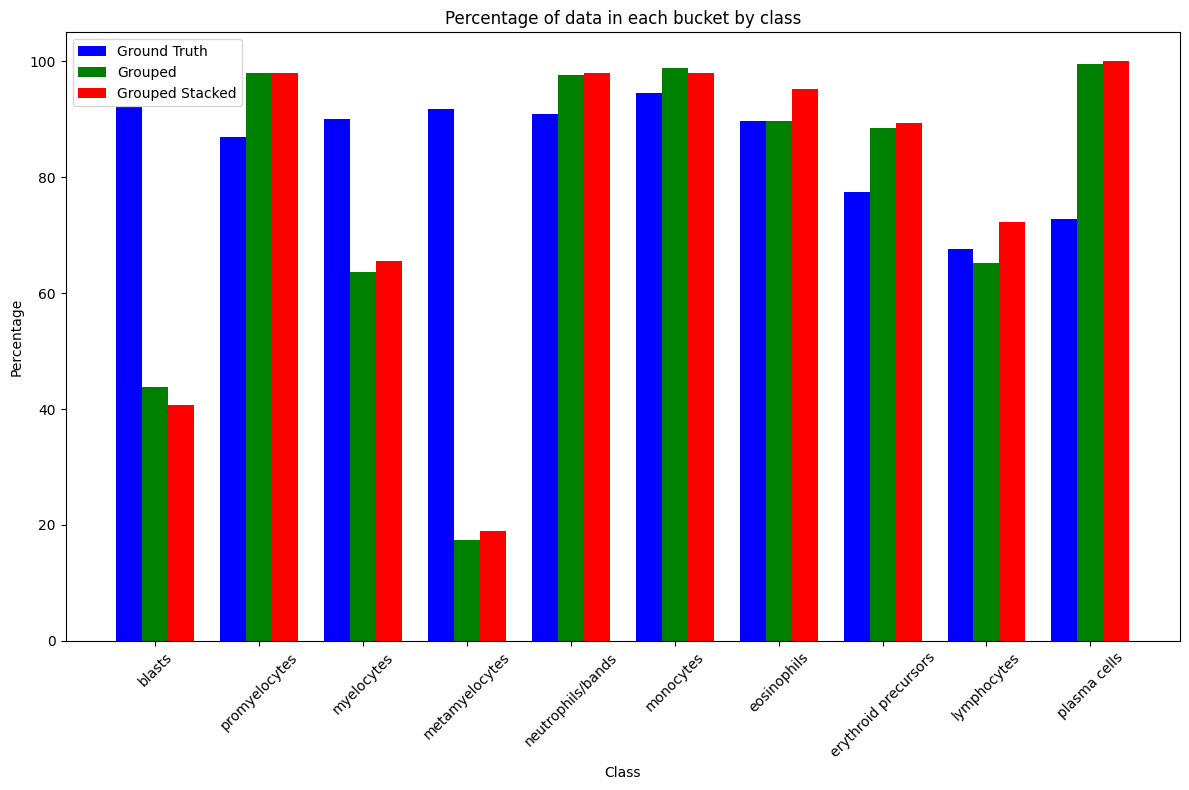

In [13]:
# NOW WE DO THE SAME THING BUT FOR ADJUSTED BMA AND LYMPHOCYTES
import matplotlib.pyplot as plt
import numpy as np

# Data setup (Assuming df and BMA_final_classes, grouped_class_buckets are predefined)
percentages = {"ground truth": [], "grouped": [], "grouped_stacked": []}
classes = []

# Calculate percentages for each class and bucket type
for class_ in BMA_final_classes:
    lower, upper = grouped_class_buckets[class_]
    # Replace 'normal' with 'ground truth'
    ground_truth_count = (
        len(df[(df[class_] >= lower) & (df[class_] <= upper)]) / len(df) * 100
    )

    if (
        class_ == "lymphocytes"
    ):  # we should have lymphocytes_grouped+M1L2 and lymphocytes_grouped-L2M1
        grouped_count = (
            len(
                df[
                    (df["lymphocytes_grouped+M1L2"] >= lower)
                    & (df["lymphocytes_grouped+M1L2"] <= upper)
                ]
            )
            / len(df)
            * 100
        )
        stacked_count = (
            len(
                df[
                    (df["lymphocytes_grouped_stacked+M1L2"] >= lower)
                    & (df["lymphocytes_grouped_stacked+M1L2"] <= upper)
                ]
            )
            / len(df)
            * 100
        )
    elif class_ == "blasts":
        grouped_count = (
            len(
                df[
                    (df["blasts_grouped-M1L2"] >= lower)
                    & (df["blasts_grouped-M1L2"] <= upper)
                ]
            )
            / len(df)
            * 100
        )
        stacked_count = (
            len(
                df[
                    (df["blasts_grouped_stacked-M1L2"] >= lower)
                    & (df["blasts_grouped_stacked-M1L2"] <= upper)
                ]
            )
            / len(df)
            * 100
        )
    else:
        grouped_count = (
            len(
                df[
                    (df[class_ + "_grouped"] >= lower)
                    & (df[class_ + "_grouped"] <= upper)
                ]
            )
            / len(df)
            * 100
        )
        stacked_count = (
            len(
                df[
                    (df[class_ + "_grouped_stacked"] >= lower)
                    & (df[class_ + "_grouped_stacked"] <= upper)
                ]
            )
            / len(df)
            * 100
        )

    percentages["ground truth"].append(ground_truth_count)
    percentages["grouped"].append(grouped_count)
    percentages["grouped_stacked"].append(stacked_count)
    classes.append(class_)

# Number of groups
num_classes = len(classes)
index = np.arange(num_classes)  # Group positions
bar_width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Create bars for each data type
rects1 = ax.bar(
    index, percentages["ground truth"], bar_width, label="Ground Truth", color="b"
)
rects2 = ax.bar(
    index + bar_width, percentages["grouped"], bar_width, label="Grouped", color="g"
)
rects3 = ax.bar(
    index + 2 * bar_width,
    percentages["grouped_stacked"],
    bar_width,
    label="Grouped Stacked",
    color="r",
)

# Add some text for labels, title and axes ticks
ax.set_xlabel("Class")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of data in each bucket by class")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()